In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import squareform
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from os.path import join as pjoin

import os 
DATA_DIR = '/home/hhansen/DecontextEmbeddings/data'
os.environ['DATA_DIR'] = DATA_DIR
os.environ['EMBEDDING_EVALUATION_DATA_PATH'] = '/home/hhansen/decon/decon_env/DecontextEmbeddings/helpers/embedding_evaluation/data/'

FIGURE_OUTPUT_DIR = pjoin(DATA_DIR, 'figures', 'things_rsa')

from scipy.stats import spearmanr, pearsonr
from scipy.spatial.distance import squareform
import numpy as np 
from collections import defaultdict

import os 
import sys 
sys.path.append('/home/hhansen/decon/decon_env/DecontextEmbeddings')

from helpers.things_evaluation.evaluate import read_embeddings, load_behav, load_sorting, match_behv_sim, evaluate as run_evaluation
from helpers.plot import get_ax, set_style_and_font_size, model_prettify

set_style_and_font_size()

from helpers.data import load_things_database

/home/hhansen/decon/decon_env/DecontextEmbeddings/data


In [2]:
things = load_things_database()
things = things.set_index('uniqueID')
things

,Word,Example image,Bigram,Percent_known,Rank (combining COCA/concreteness),Concreteness (M),COCA word freq (online),COCA word freq,COCA (dispersion),COCA (rank),...,Top-down Category (WordNet),Top-down Category (manual selection),All Bottom-up Categories,WordNet Synonyms,WordNet ID,Wordnet ID2,Wordnet ID3,Wordnet ID4,"Definition (from WordNet, Google, or Wikipedia)",Number of word meanings in list
uniqueID,,,,,,,,,,,,,,,,,,,,,
aardvark,aardvark,https://imgur.com/LAJGlN0,0,1.00,18158.5,4.68,53,28.0,0.78,51507.0,...,animal,animal,animal,"aardvark, ant_bear, anteater, Orycteropus_afer",n02082791,aardvark%1:05:00::,aardvark#1,aardvark.n.01,nocturnal burrowing mammal of the grasslands o...,1
abacus,abacus,https://imgur.com/peZeM0l,0,0.93,17741.0,4.52,188,97.0,0.86,34578.0,...,NaN,home decor,mathematical device,abacus,n02666196,abacus%1:06:00::,abacus#2,abacus.n.02,a calculator that performs arithmetic function...,1
accordion,accordion,https://imgur.com/GgGvdZR,0,0.97,8541.0,4.86,816,735.0,0.90,15132.0,...,musical instrument,musical instrument,musical instrument,"accordion, piano_accordion, squeeze_box",n02672831,accordion%1:06:00::,accordion#1,accordion.n.01,a portable box-shaped free-reed instrument; th...,1
acorn,acorn,https://imgur.com/YfIB5lM,0,1.00,7723.5,4.96,1289,692.0,0.85,16007.0,...,fruit,NaN,nut,acorn,n12267677,acorn%1:20:00::,acorn#1,acorn.n.01,fruit of the oak tree: a smooth thin-walled nu...,1
air_conditioner,air conditioner,https://imgur.com/KqYNwWH,1,1.00,12115.0,4.93,943,NaN,NaN,NaN,...,NaN,electronic device,home appliance,"air_conditioner, air_conditioning",n02686379,air_conditioner%1:06:00::,air_conditioner#1,air_conditioner.n.01,a system that keeps air cool and dry,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yoke,yoke,https://imgur.com/nOt3K3f,0,0.97,9558.5,4.83,692,597.0,0.90,16792.0,...,NaN,NaN,"farm equipment, animal harness",yoke,n04612840,yoke%1:06:00::,yoke#7,yoke.n.07,stable gear that joins two draft animals at th...,1
yolk,yolk,https://imgur.com/gWY0jPO,0,0.96,7970.5,4.78,881,1224.0,0.89,11647.0,...,food,food,part of egg,"egg_yolk, yolk",n07841345,yolk%1:13:00::,yolk#1,yolk.n.01,the yellow spherical part of an egg that is su...,1
zebra,zebra,https://imgur.com/xg5AAHb,0,1.00,8136.5,4.86,1066,839.0,0.87,14397.0,...,animal,animal,animal,zebra,n02391049,zebra%1:05:00::,zebra#1,zebra.n.01,any of several fleet black-and-white striped A...,1


In [3]:
freq_col = 'COCA word freq (online)'
things_ids_sorted_by_freq = things.sort_values(by=freq_col, ascending=False)
things_ids_sorted_by_freq

,Word,Example image,Bigram,Percent_known,Rank (combining COCA/concreteness),Concreteness (M),COCA word freq (online),COCA word freq,COCA (dispersion),COCA (rank),...,Top-down Category (WordNet),Top-down Category (manual selection),All Bottom-up Categories,WordNet Synonyms,WordNet ID,Wordnet ID2,Wordnet ID3,Wordnet ID4,"Definition (from WordNet, Google, or Wikipedia)",Number of word meanings in list
uniqueID,,,,,,,,,,,,,,,,,,,,,
man,man,https://imgur.com/5HJRMbh,0,1.00,2285.5,4.79,344413,409760.0,0.95,94.0,...,NaN,NaN,human,"man, adult_male",n10287213,man%1:18:00::,man#1,man.n.01,an adult person who is male (as opposed to a w...,1
money,money,https://imgur.com/elV4wDf,0,1.00,4714.0,4.54,213087,164794.0,0.95,232.0,...,NaN,NaN,currency,money,n13384557,money%1:21:00::,money#1,money.n.01,the most common medium of exchange; functions ...,1
woman,woman,https://imgur.com/BCjGd8F,0,1.00,5314.5,4.46,184376,341422.0,0.98,111.0,...,NaN,NaN,"human, female","woman, adult_female",n10787470,woman%1:18:00::,woman#1,woman.n.01,an adult female person (as opposed to a man),1
hand,hand,https://imgur.com/3Yx8134,0,1.00,2964.5,4.72,181438,225247.0,0.91,174.0,...,body part,body part,body part,"hand, manus, mitt, paw",n05564590,hand%1:08:00::,hand#1,hand.n.01,the (prehensile) extremity of the superior limb,1
table,table,https://imgur.com/wbDfxxz,0,1.00,1213.5,4.90,159280,75228.0,0.93,539.0,...,furniture,furniture,furniture,table,n04379243,table%1:06:01::,table#2,table.n.02,a piece of furniture having a smooth flat top ...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jetski,jetski,https://imgur.com/UBVYMif,0,1.00,15877.0,4.89,4,NaN,NaN,NaN,...,NaN,vehicle,watercraft,"jetski, jet_ski",NaN,NaN,NaN,NaN,"a small, jet-propelled vehicle that skims acro...",1
mousepad,mousepad,https://imgur.com/i5OzCkB,0,1.00,17098.0,4.83,4,NaN,NaN,NaN,...,NaN,NaN,computer accessory,"mousepad, mouse_mat",n03794655,mousepad%1:06:00::,mousepad#1,mousepad.n.01,a small portable pad that provides traction fo...,1
backscratcher,backscratcher,https://imgur.com/2O5lC05,0,0.96,19585.0,4.58,3,NaN,NaN,NaN,...,NaN,tool,tool,backscratcher,n02770721,backscratcher%1:06:00::,backscratcher#2,backscratcher.n.02,a long-handled scratcher for scratching your back,1


In [4]:
n_batches = 30

In [5]:
batches_of_things_ids_sorted = np.array_split(things_ids_sorted_by_freq, n_batches)
batches_of_things_ids_sorted

[            Word              Example image  Bigram  Percent_known  \
 uniqueID                                                             
 man          man  https://imgur.com/5HJRMbh       0            1.0   
 money      money  https://imgur.com/elV4wDf       0            1.0   
 woman      woman  https://imgur.com/BCjGd8F       0            1.0   
 hand        hand  https://imgur.com/3Yx8134       0            1.0   
 table      table  https://imgur.com/wbDfxxz       0            1.0   
 ...          ...                        ...     ...            ...   
 card        card  https://imgur.com/NlH9oXG       0            1.0   
 closet    closet  https://imgur.com/ZGlyr1M       0            1.0   
 screen1   screen  https://imgur.com/SSK1q2I       0            1.0   
 screen2   screen  https://imgur.com/5vxvRis       0            1.0   
 snow        snow  https://imgur.com/CbQqlW8       0            1.0   
 
           Rank (combining COCA/concreteness)  Concreteness (M)  \
 uniqueI

In [6]:

from collections import defaultdict
import os 

matching = 'word'

combs = {
            'bert-base': 12,
            'gpt-2': 12
}




results = defaultdict(list)

mean = defaultdict(list)


for batch_idx, batch in enumerate(batches_of_things_ids_sorted):
    matching_words_things = list(batch['Word'])
    for model, layer in combs.items():
        print(f'{batch_idx} {model}')
        path = f'{EMBEDDING_DATA_DIR}/thinga/wikidumps/decontext/{model}/{layer}/{matching}/mean/all/decontext.txt'
        pearson, spearman, matrix, vector = run_evaluation(path, matching=matching, matching_words=matching_words_things)
        results[model].append(spearman.correlation)
        
        mean[model].append(batch[freq_col].mean())



0 bert-base
Index(['arm', 'baby', 'bag', 'ball', 'bank', 'baseball', 'bed', 'board',
       'book', 'bowl', 'box', 'boy', 'bush', 'car', 'card', 'chair', 'closet',
       'coffee', 'computer', 'cup', 'dog', 'door', 'eye', 'face', 'film',
       'fire', 'fish', 'foot', 'football', 'game', 'girl', 'glass', 'gold',
       'gun', 'hair', 'hand', 'ice', 'jack', 'man', 'money', 'mouth', 'oil',
       'paper', 'phone', 'photograph', 'plant', 'radio', 'record', 'rock',
       'scale', 'skin', 'snow', 'table', 'television', 'tree', 'wall',
       'window', 'woman'],
      dtype='object', name='things_id')
0 gpt-2
Index(['arm', 'baby', 'bag', 'ball', 'bank', 'baseball', 'bed', 'board',
       'book', 'bowl', 'box', 'boy', 'bush', 'car', 'card', 'chair', 'closet',
       'coffee', 'computer', 'cup', 'dog', 'door', 'eye', 'face', 'film',
       'fire', 'fish', 'foot', 'football', 'game', 'girl', 'glass', 'gold',
       'gun', 'hair', 'hand', 'ice', 'jack', 'man', 'money', 'mouth', 'oil',
       'p

Index(['armor', 'arrow', 'backpack', 'balloon', 'banana', 'banner', 'bee',
       'berry', 'bolt', 'bug', 'butterfly', 'candle', 'cannon', 'cardinal',
       'carriage', 'coconut', 'coffin', 'coin', 'coral', 'crab', 'curry',
       'ferry', 'fireplace', 'flashlight', 'foam', 'gauge', 'granite', 'gum',
       'ham', 'ivy', 'jam', 'lettuce', 'mattress', 'microphone', 'microwave',
       'modem', 'necklace', 'patty', 'pumpkin', 'ribbon', 'robe', 'rug',
       'saddle', 'sausage', 'seafood', 'slot', 'snack', 'spinach', 'squash',
       'suitcase', 'sunglasses', 'syrup', 'tackle', 'tee', 'toast', 'tooth',
       'triangle', 'trophy', 'turf', 'umbrella', 'underwear', 'yogurt'],
      dtype='object', name='things_id')
7 gpt-2
Index(['armor', 'arrow', 'backpack', 'balloon', 'banana', 'banner', 'bee',
       'berry', 'bolt', 'bug', 'butterfly', 'candle', 'cannon', 'cardinal',
       'carriage', 'coconut', 'coffin', 'coin', 'coral', 'crab', 'curry',
       'ferry', 'fireplace', 'flashlight', 'fo

Index(['acorn', 'alligator', 'antelope', 'appetizer', 'brace', 'caramel',
       'caterpillar', 'chandelier', 'chute', 'cobra', 'comb', 'cornmeal',
       'cracker', 'dishwasher', 'dynamite', 'espresso', 'eyepiece', 'faucet',
       'fingerprint', 'firewood', 'gorilla', 'harp', 'hinge', 'incense',
       'kitten', 'mascara', 'melon', 'minivan', 'moth', 'paddle', 'pancake',
       'panther', 'panties', 'parrot', 'peacock', 'pesto', 'projector', 'puck',
       'reindeer', 'rooster', 'sail', 'scaffolding', 'scooter', 'spam', 'spur',
       'stuffing', 'syringe', 'tapestry', 'timer', 'tripod', 'wreath',
       'wrench', 'yarn'],
      dtype='object', name='things_id')
13 gpt-2
Index(['acorn', 'alligator', 'antelope', 'appetizer', 'brace', 'caramel',
       'caterpillar', 'chandelier', 'chute', 'cobra', 'comb', 'cornmeal',
       'cracker', 'dishwasher', 'dynamite', 'espresso', 'eyepiece', 'faucet',
       'fingerprint', 'firewood', 'gorilla', 'harp', 'hinge', 'incense',
       'kitten', 'm

Index(['aloe', 'anvil', 'applesauce', 'bandanna', 'beehive', 'chainsaw',
       'chisel', 'cockroach', 'corset', 'crutch', 'dandelion', 'deodorant',
       'dogfood', 'donut', 'duster', 'eraser', 'flamingo', 'gallows', 'gavel',
       'goblet', 'grasshopper', 'guacamole', 'hummus', 'joystick',
       'kaleidoscope', 'keg', 'kiwi', 'lectern', 'licorice', 'marshmallow',
       'ostrich', 'ottoman', 'paintbrush', 'petal', 'pulley', 'quill',
       'radish', 'retainer', 'salami', 'sandal', 'sandbox', 'sloth',
       'smoothie', 'snowman', 'starfish', 'stethoscope', 'teacup', 'tiara',
       'vulture', 'washcloth'],
      dtype='object', name='things_id')
19 gpt-2
Index(['aloe', 'anvil', 'applesauce', 'bandanna', 'beehive', 'chainsaw',
       'chisel', 'cockroach', 'corset', 'crutch', 'dandelion', 'deodorant',
       'dogfood', 'donut', 'duster', 'eraser', 'flamingo', 'gallows', 'gavel',
       'goblet', 'grasshopper', 'guacamole', 'hummus', 'joystick',
       'kaleidoscope', 'keg', 'kiwi',

Index(['alpaca', 'backgammon', 'bassinet', 'bazooka', 'beanbag', 'bedpost',
       'birdbath', 'birdcage', 'birdhouse', 'blowfish', 'blowtorch',
       'breathalyzer', 'bunkbed', 'gyro', 'gyroscope', 'highlighter',
       'hopscotch', 'kebab', 'ladybug', 'lampshade', 'loincloth', 'lunchbox',
       'moccasin', 'penlight', 'piglet', 'pillbox', 'plunger', 'sandbag',
       'scone', 'seaplane', 'snorkel', 'snowplow', 'steamroller', 'tadpole',
       'teepee', 'terrarium', 'tiramisu', 'touchpad', 'trashcan', 'tumbleweed',
       'wetsuit', 'xylophone'],
      dtype='object', name='things_id')
26 bert-base
Index(['airboat', 'bagpipe', 'baklava', 'barnacle', 'bassoon', 'bedpan',
       'blinder', 'chive', 'corsage', 'cummerbund', 'dalmatian', 'doorstop',
       'dustpan', 'exerciser', 'gearshift', 'handcuff', 'handprint',
       'hippopotamus', 'hookah', 'hotdog', 'hovercraft', 'inkwell', 'insole',
       'lanyard', 'magnifier', 'muff', 'payphone', 'pickax', 'poinsettia',
       'quesadilla'

In [7]:

from collections import defaultdict
import os 

matching = 'word'

combs = {
            'bert-base': 12,
            'gpt-2': 12
}




cum_results = defaultdict(list)

cum_mean = defaultdict(list)



def get_cum_list(idx):
    matching_words_things = []
    freqs = []
    
    for batch in batches_of_things_ids_sorted[0:idx+1]:
        matching_words_things += list(batch['Word'])
        freqs += list(batch[freq_col])
        
    return matching_words_things, np.asarray(freqs)

for batch_idx, batch in enumerate(batches_of_things_ids_sorted):    
    matching_words_things, freqs = get_cum_list(batch_idx)
    
    for model, layer in combs.items():
        print(f'{batch_idx} {model}')
        path = f'{EMBEDDING_DATA_DIR}/thinga/wikidumps/decontext/{model}/{layer}/{matching}/mean/all/decontext.txt'
        pearson, spearman, matrix, vector = run_evaluation(path, matching=matching, matching_words=matching_words_things)
        cum_results[model].append(spearman.correlation)
        cum_mean[model].append(freqs.mean())

0 bert-base
Index(['arm', 'baby', 'bag', 'ball', 'bank', 'baseball', 'bed', 'board',
       'book', 'bowl', 'box', 'boy', 'bush', 'car', 'card', 'chair', 'closet',
       'coffee', 'computer', 'cup', 'dog', 'door', 'eye', 'face', 'film',
       'fire', 'fish', 'foot', 'football', 'game', 'girl', 'glass', 'gold',
       'gun', 'hair', 'hand', 'ice', 'jack', 'man', 'money', 'mouth', 'oil',
       'paper', 'phone', 'photograph', 'plant', 'radio', 'record', 'rock',
       'scale', 'skin', 'snow', 'table', 'television', 'tree', 'wall',
       'window', 'woman'],
      dtype='object', name='things_id')
0 gpt-2
Index(['arm', 'baby', 'bag', 'ball', 'bank', 'baseball', 'bed', 'board',
       'book', 'bowl', 'box', 'boy', 'bush', 'car', 'card', 'chair', 'closet',
       'coffee', 'computer', 'cup', 'dog', 'door', 'eye', 'face', 'film',
       'fire', 'fish', 'foot', 'football', 'game', 'girl', 'glass', 'gold',
       'gun', 'hair', 'hand', 'ice', 'jack', 'man', 'money', 'mouth', 'oil',
       'p

13 gpt-2
Index(['acorn', 'airplane', 'album', 'alligator', 'almond', 'altar', 'amber',
       'ambulance', 'anchor', 'ankle',
       ...
       'wrap', 'wreath', 'wreck', 'wrench', 'wrist', 'yacht', 'yarn', 'yogurt',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=790)
14 bert-base
Index(['acorn', 'airplane', 'album', 'alligator', 'almond', 'altar', 'amber',
       'ambulance', 'anchor', 'ankle',
       ...
       'wreath', 'wreck', 'wrench', 'wrist', 'yacht', 'yarn', 'yogurt',
       'zebra', 'zipper', 'zucchini'],
      dtype='object', name='things_id', length=842)
14 gpt-2
Index(['acorn', 'airplane', 'album', 'alligator', 'almond', 'altar', 'amber',
       'ambulance', 'anchor', 'ankle',
       ...
       'wreath', 'wreck', 'wrench', 'wrist', 'yacht', 'yarn', 'yogurt',
       'zebra', 'zipper', 'zucchini'],
      dtype='object', name='things_id', length=842)
15 bert-base
Index(['acorn', 'airplane', 'album', 'alligator', 'almond', 'altar', 'amber',
      

27 gpt-2
Index(['abacus', 'accordion', 'acorn', 'airbag', 'airboat', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'yacht', 'yak', 'yarn', 'yo-yo', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1451)
28 bert-base
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airboat',
       'airplane', 'album', 'alligator', 'almond',
       ...
       'yacht', 'yak', 'yarn', 'yo-yo', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1479)
28 gpt-2
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airboat',
       'airplane', 'album', 'alligator', 'almond',
       ...
       'yacht', 'yak', 'yarn', 'yo-yo', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1479)
29 bert-base
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airboat',
       'airp

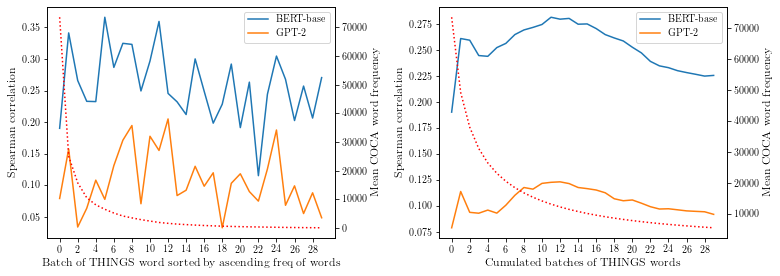

In [13]:
fig, axes = plt.subplots(1,2, figsize=(11, 4))

axes[0].plot(range(n_batches), results['bert-base'], label=model_prettify('bert-base'))
axes[0].plot(range(n_batches), results['gpt-2'], label=model_prettify('gpt-2'))
ax2 = axes[0].twinx()
ax2.plot(range(n_batches), mean['gpt-2'], label='mean frequency of batch', c='r', linestyle='dotted')
ax2.set_ylabel('Mean COCA word frequency')

axes[0].set_xlabel('Batch of THINGS word sorted by ascending freq of words')
axes[0].set_ylabel('Spearman correlation')
axes[0].set_xticks(range(0, n_batches, 2))
axes[0].legend()

axes[1].plot(range(n_batches), cum_results['bert-base'], label=model_prettify('bert-base'))
axes[1].plot(range(n_batches), cum_results['gpt-2'], label=model_prettify('gpt-2'))
ax3 = axes[1].twinx()
ax3.plot(range(n_batches), cum_mean['gpt-2'], label='mean frequency of batch', c='r', linestyle='dotted')
ax3.set_ylabel('Mean COCA word frequency')

axes[1].set_xlabel('Cumulated batches of THINGS words')
axes[1].set_ylabel('Spearman correlation')
axes[1].set_xticks(range(0, n_batches, 2))
axes[1].legend()

plt.tight_layout()
plt.savefig('tail.pdf', bbox_inches='tight')